# League of Legends Diamond Ranked Game Analysis

***
### Student Names:
#### - Anton Angelo Carasig (s306344)
#### - Khang Nguyen (s3894597)
#### - Oliver Guzowski (s3897734)

***
## Table of Contents:
* [Introduction](#itr)
    + [Dataset Source](#dss)


## Introduction: <a id='itr'></a>

***
### Dataset Source <a id='dss'></a>

The League of Legends Diamond Ranked Games dataset used in this study was obtained from Kaggle ("michel's fanboy", 2021). This dataset contains the first 10 mins of roughly 10,000 ranked games, with players ranked from DIAMOND 1 to MASTER and using the "Solo Queue" feature of the game.

***
### Dataset Details

The dataset holds information regarding the first 10 minutes of League of Legends "ranked-games", a multiplayer online battle arena where 2 teams of 5 players are pitted against each other (Blue vs Red). A ranked-game is a gamemode where players of similar skill level are placed in a match against each other, meaning that since this dataset only contains "DIAMOND to MASTER" rank players, the population only contained players with high skill level. In addition, the "Solo-Queue" feature of the game means that an individual are randomly picked and placed in a team with other individuals, this implies that the team members have never communicate with each other before and must work together to win the match.

The dataset main features contains information about whether a team had won the match, how much gold a team has accumulated, numbers of kills and deaths. There are additional features that further detail on the team's action through out the first 10 minutes, such as how many wards placed, number of minions vanquished, and number of towers (The opposing team's defense mechanism) destroyed. Ther are also features that describes the team's performance such as the average level between all 5 players, the total experience the players earned, and their gold gain per minute.

There are 9879 unqiue observations within the dataset and 19 features for each team, Blue and Red, totalling 38 features.

***
### Context and Glossary

* League of Legends (LoL)
* Multiplayer Online Battle Arena (MOBA)
* ELO: A rating system that determines the quality of a player in a team. Diamond players are in the top 0.5% of the LoL playerbase.

Team-Specific Objectives: <i>(These objectives must be accomplished by either team to win)</i>

* Nexus: The main objective of the game, destroying the enemy nexus declares your team as the winner.
* Towers/Turrets: Structures that must be destroyed to reach the enemy nexus.

Other terminology:
* Elite Monsters: Monsters that provide high gold/xp to the player that defeats it.
* Dragon: A monster that gives bonuses to the team that defeats it.
* Herald: A monster that assists in knocking down the enemy turrets.
* Wards: Are team specific, purchaseable items. They provide "vision" to the team, allowing to see where enemies and objectives are currently; vital for making co-ordinated plays in higher ELO games and overall control of the game.
* Champion: The character that the player is controlling.
* Level: The level of the champion that the player is controlling. Gaining XP increases champion level. Starts at level 1 when the game starts, the maximum level is 18.
* First Blood: The first player that kills another player in the game gets extra gold, putting them at an advantage of others.

***
### Dataset Features

The features in our dataset are described in the table below. These descriptions are taken from the Kaggle data source.

In [2]:
import pandas as pd

table = [['gameId','Nominal categorical','NA','Unique RIOT ID of the game. Can be used with the Riot Games API.'],
         ['blueWins','Binary','NA','The target column. 1 if the blue team has won, 0 otherwise.'],
         ['blueWardsPlaced','Numeric','NA','Number of warding totems placed by the blue team on the map'],
         ['blueWardsDestroyed','Numeric','NA','Number of enemy warding totems the blue team has destroyed'],
         ['blueFirstBlood','Binary','NA','First kill of the game. 1 if the blue team did the first kill, 0 otherwise'],
         ['blueKills','Numeric','NA','Number of enemies killed by the blue team'],
         ['blueDeaths','Numeric','NA','Number of deaths (blue team)'],
         ['blueAssists','Numeric','NA','Number of kill assists (blue team)'],
         ['blueEliteMonsters','Numeric','NA','Number of elite monsters killed by the blue team (Dragons and Heralds)'],
         ['blueDragons','Numeric','NA','Number of dragons killed by the blue team'],
         ['blueHeralds','Numeric','NA','Number of heralds killed by the blue team'],
         ['blueTowersDestroyed','Numeric','NA','Number of structures destroyed by the blue team (towers...)'],
         ['blueTotalGold','Numeric','NA','Blue team total gold'],
         ['blueAvgLevel','Numeric','NA','Blue team average champion level'],
         ['blueTotalExperience','Numeric','NA','Blue team total experience'],
         ['blueTotalMinionsKilled','Numeric','NA','Blue team total minions killed (CS)'],
         ['blueTotalJungleMinionsKilled','Numeric','NA','Blue team total jungle monsters killed'],
         ['blueGoldDiff','Numeric','NA','Blue team gold difference compared to the enemy team'],
         ['blueExperienceDiff','Numeric','NA','Blue team experience difference compared to the enemy team'],
         ['blueCSPerMin','Numeric','cs/min','Blue team CS (minions) per minute'],
         ['blueGoldPerMin','Numeric','gold/min','Blue team gold per minute'],
         ['redWardsPlaced','Numeric','NA','Number of warding totems placed by the red team on the map'],
         ['redWardsDestroyed','Numeric','NA','Number of enemy warding totems the red team has destroyed'],
         ['redFirstBlood','Numeric','NA','First kill of the game. 1 if the red team did the first kill, 0 otherwise'],
         ['redKills','Binary','NA','Number of enemies killed by the red team'],
         ['redDeaths','Numeric','NA','Number of deaths (red team)'],
         ['redAssists','Numeric','NA','Number of kill assists (red team)'],
         ['redEliteMonsters','Numeric','NA','Number of elite monsters killed by the red team (Dragons and Heralds)'],
         ['redDragons','Numeric','NA','Number of dragons killed by the red team'],
         ['redHeralds','Numeric','NA','Number of heralds killed by the red team'],
         ['redTowersDestroyed','Numeric','NA','Number of structures destroyed by the red team (towers...)'],
         ['redTotalGold','Numeric','NA','Red team total gold'],
         ['redAvgLevel','Numeric','NA','Red team average champion level'],
         ['redTotalExperience','Numeric','NA','Red team total experience'],
         ['redTotalMinionsKilled','Numeric','NA','Red team total minions killed (CS)'],
         ['redTotalJungleMinionsKilled','Numeric','NA','Red team total jungle monsters killed'],
         ['redGoldDiff','Numeric','NA','Red team gold difference compared to the enemy team'],
         ['redExperienceDiff','Numeric','NA','Red team experience difference compared to the enemy team'],
         ['redCSPerMin','Numeric','cs/min','Red team CS (minions) per minute'],
         ['redGoldPerMin','Numeric','gold/min','Red team gold per minute']]

df = pd.DataFrame(table, columns = ['Name','Data Type','Units','Description']) 
df.style

,Name,Data Type,Units,Description
0,gameId,Nominal categorical,NA,Unique RIOT ID of the game. Can be used with the Riot Games API.
1,blueWins,Binary,NA,"The target column. 1 if the blue team has won, 0 otherwise."
2,blueWardsPlaced,Numeric,NA,Number of warding totems placed by the blue team on the map
3,blueWardsDestroyed,Numeric,NA,Number of enemy warding totems the blue team has destroyed
4,blueFirstBlood,Binary,NA,"First kill of the game. 1 if the blue team did the first kill, 0 otherwise"
5,blueKills,Numeric,NA,Number of enemies killed by the blue team
6,blueDeaths,Numeric,NA,Number of deaths (blue team)
7,blueAssists,Numeric,NA,Number of kill assists (blue team)
8,blueEliteMonsters,Numeric,NA,Number of elite monsters killed by the blue team (Dragons and Heralds)
9,blueDragons,Numeric,NA,Number of dragons killed by the blue team


***
## Target Response Variable:



This project's target feature in the dataset will be "Blue Wins" (1 = Blue won, 0 = Red won). We will be observing what factors play a more contributive role to this boolean value.

## Goals and Objectives:

Recent years has shown exponential growth towards the eSports genre, with League of Legends currently standing as one of the most popular video game and eSport being played in the world with over 8 million daily players according to the developers [Riot Games](https://www.leagueoflegends.com/en-us/news/game-updates/). Taking in the top 0.5% of players of such a large player-base into account, it becomes vital to understand what factors contribute the most into a winning game, where minor advantages to a team can snowball heavily into a win. Game data analytics allow developers to study patterns in player behavior and overall trends within a game, with such analysis enabling shifts in the game meta that suits the company's goals. Such understanding in turn enables for a model that can decipher the weighted importance of each factor of the game, whether that be 'First Bloods', 'Dragons' or some other objective. Conclusively, it enables future features to be implemented, suited to support the company's agenda such as a more passive-focused game average with lower kill-counts or a more hyper-aggressive objective focus that places a neutral objective such as the 'Herald' at a high importance. 

In essence, the main objective of this project is to decipher which factors contribute the most into a conclusive win. Exploratory data analysis utilizing some descriptive statistics and data visualization tools will be used to assist in offering insight as to different patterns and relationships that can be seen within LoL ranked games. Doing so will enable us to achieve our end-goal for the project, as well as offering extra understanding to the prominence that other factors may play in generating a winning lead for the team.

## Data Preprocessing

### Data Retrieval

+ We will being the data preprocessing by importing the dataset, and display 10 randomly sampled rows.

In [3]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests

pd.set_option('display.max_columns', None) 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")


# df = df.style.set_precision(3)

df = pd.read_csv("ranked_games.csv")
df.sample(10, random_state=999)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
4387,4487157845,0,20,5,1,4,5,7,0,0,0,0,15067,6.8,17232,172,56,-1641,-1610,17.2,1506.7,19,4,0,5,4,10,0,0,0,0,16708,7.4,18842,254,52,1641,1610,25.4,1670.8
3500,4525068217,0,16,25,0,5,7,5,0,0,0,0,16763,7.2,19010,252,48,-729,-620,25.2,1676.3,43,5,1,7,5,6,2,1,1,0,17492,7.2,19630,241,61,729,620,24.1,1749.2
790,4524662465,1,16,1,0,11,4,18,1,1,0,0,19695,7.2,19512,258,48,3936,2111,25.8,1969.5,12,2,1,4,11,4,1,0,1,0,15759,7.0,17401,205,68,-3936,-2111,20.5,1575.9
7993,4484601181,1,16,0,0,8,5,8,2,1,1,0,17390,7.2,19016,212,60,1716,1837,21.2,1739.0,15,1,1,5,8,8,0,0,0,0,15674,6.8,17179,226,36,-1716,-1837,22.6,1567.4
4910,4513962663,0,20,2,1,8,7,5,1,0,1,0,16815,7.0,18326,207,41,10,223,20.7,1681.5,19,6,0,7,8,8,0,0,0,0,16805,6.8,18103,241,48,-10,-223,24.1,1680.5
3156,4519875448,0,21,5,1,6,5,14,1,1,0,0,16986,7.0,17323,231,55,313,-1776,23.1,1698.6,16,8,0,5,6,3,1,0,1,0,16673,7.2,19099,236,56,-313,1776,23.6,1667.3
7490,4510135143,0,48,2,1,7,5,10,0,0,0,0,17037,7.0,17825,237,40,987,-377,23.7,1703.7,15,5,0,5,7,5,2,1,1,0,16050,7.0,18202,219,60,-987,377,21.9,1605.0
6340,4452482397,1,15,4,1,4,4,3,0,0,0,0,14559,6.8,17491,191,44,-1348,-10,19.1,1455.9,91,2,0,4,4,6,1,0,1,0,15907,6.6,17501,202,54,1348,10,20.2,1590.7
7662,4484391297,1,13,2,0,4,4,0,1,0,1,1,17079,7.4,19361,250,66,1680,2384,25.0,1707.9,50,2,1,4,4,3,0,0,0,0,15399,6.6,16977,200,62,-1680,-2384,20.0,1539.9
210,4490435808,0,13,5,1,5,5,8,1,0,1,0,16009,6.8,18033,220,40,540,269,22.0,1600.9,15,2,0,5,5,8,1,1,0,0,15469,6.8,17764,185,54,-540,-269,18.5,1546.9


### Data Cleaning

First we will determine which feature within our database is irrelevant and drop it. We will begin by displaying all the features.

In [4]:
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

1.   `blueEliteMonsters` displays the numbers of "Elite" monsters that the team had killed such as Dragons and Heralds, however since the numbers of dragons and heralds killed are being tracked in the features, represented by `blueDragons` and `blueHeralds` respectively, as such `blueEliteMonsters` can be safely dropped from the table. This includes the red team as well.

2. `blueGoldDiff`, `blueExperienceDiff`, `blueCSPerMin`, `blueGoldPerMin` are also unnecessary for the dataset as those numbers can be easily calculated using existing columns, such data is irrelevant and will need to be dropped. The same is applied for the red team as well.

3. `gameId` is a unique code given to each game, since individual games are unique and not correlated with each other it needs to be dropped.

4. `redFirstBlood` tracks whether or not red got the first kill, the contents of this column can be determined from `blueFirstBlood` as exactly one of these 2 columns has to be true, meaning that `redFirstBlood` can be dropped.

In [5]:
# Dropping the unnecessary features from the dataset

df = df.drop(columns=["gameId", "blueEliteMonsters", "redEliteMonsters", "blueGoldDiff", "redGoldDiff", "blueExperienceDiff", "redExperienceDiff", "blueCSPerMin", "redCSPerMin", "blueGoldPerMin", "redGoldPerMin","redFirstBlood"])

In [6]:
# Display the table after dropped columns

df.sample(10, random_state=999)

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,redWardsPlaced,redWardsDestroyed,redKills,redDeaths,redAssists,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled
4387,0,20,5,1,4,5,7,0,0,0,15067,6.8,17232,172,56,19,4,5,4,10,0,0,0,16708,7.4,18842,254,52
3500,0,16,25,0,5,7,5,0,0,0,16763,7.2,19010,252,48,43,5,7,5,6,1,1,0,17492,7.2,19630,241,61
790,1,16,1,0,11,4,18,1,0,0,19695,7.2,19512,258,48,12,2,4,11,4,0,1,0,15759,7.0,17401,205,68
7993,1,16,0,0,8,5,8,1,1,0,17390,7.2,19016,212,60,15,1,5,8,8,0,0,0,15674,6.8,17179,226,36
4910,0,20,2,1,8,7,5,0,1,0,16815,7.0,18326,207,41,19,6,7,8,8,0,0,0,16805,6.8,18103,241,48
3156,0,21,5,1,6,5,14,1,0,0,16986,7.0,17323,231,55,16,8,5,6,3,0,1,0,16673,7.2,19099,236,56
7490,0,48,2,1,7,5,10,0,0,0,17037,7.0,17825,237,40,15,5,5,7,5,1,1,0,16050,7.0,18202,219,60
6340,1,15,4,1,4,4,3,0,0,0,14559,6.8,17491,191,44,91,2,4,4,6,0,1,0,15907,6.6,17501,202,54
7662,1,13,2,0,4,4,0,0,1,1,17079,7.4,19361,250,66,50,2,4,4,3,0,0,0,15399,6.6,16977,200,62
210,0,13,5,1,5,5,8,0,1,0,16009,6.8,18033,220,40,15,2,5,5,8,1,0,0,15469,6.8,17764,185,54


Next we will check if there are any missing values within the database.

In [7]:
df.isna().sum()

blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
redWardsPlaced                  0
redWardsDestroyed               0
redKills                        0
redDeaths                       0
redAssists                      0
redDragons                      0
redHeralds                      0
redTowersDestroyed              0
redTotalGold                    0
redAvgLevel                     0
redTotalExperience              0
redTotalMinionsKilled           0
redTotalJungleMinionsKilled     0
dtype: int64

Since there are no missing values, we will move on to check the data type of each features.

In [8]:
# Check for data types
print(f"Shape of the dataset = {df.shape} \n")
print(df.dtypes)

Shape of the dataset = (9879, 28) 

blueWins                          int64
blueWardsPlaced                   int64
blueWardsDestroyed                int64
blueFirstBlood                    int64
blueKills                         int64
blueDeaths                        int64
blueAssists                       int64
blueDragons                       int64
blueHeralds                       int64
blueTowersDestroyed               int64
blueTotalGold                     int64
blueAvgLevel                    float64
blueTotalExperience               int64
blueTotalMinionsKilled            int64
blueTotalJungleMinionsKilled      int64
redWardsPlaced                    int64
redWardsDestroyed                 int64
redKills                          int64
redDeaths                         int64
redAssists                        int64
redDragons                        int64
redHeralds                        int64
redTowersDestroyed                int64
redTotalGold                      int64
redA

The datatype matches each numerical features, and since they are all numerical features, we will now display the summary statistics of each features.

In [9]:
df.describe(include=['int64','float64']).T

,count,mean,std,min,25%,50%,75%,max
blueWins,9879.0,0.499038,0.500024,0.0,0.0,0.0,1.0,1.0
blueWardsPlaced,9879.0,22.288288,18.019177,5.0,14.0,16.0,20.0,250.0
blueWardsDestroyed,9879.0,2.824881,2.174998,0.0,1.0,3.0,4.0,27.0
blueFirstBlood,9879.0,0.504808,0.500002,0.0,0.0,1.0,1.0,1.0
blueKills,9879.0,6.183925,3.011028,0.0,4.0,6.0,8.0,22.0
blueDeaths,9879.0,6.137666,2.933818,0.0,4.0,6.0,8.0,22.0
blueAssists,9879.0,6.645106,4.064520,0.0,4.0,6.0,9.0,29.0
blueDragons,9879.0,0.361980,0.480597,0.0,0.0,0.0,1.0,1.0
blueHeralds,9879.0,0.187974,0.390712,0.0,0.0,0.0,0.0,1.0
blueTowersDestroyed,9879.0,0.051422,0.244369,0.0,0.0,0.0,0.0,4.0


There seems to be evidence of outliers within the database, speciffically with blueWardsPlaced and redWardsPlaced. Such outliers can be seen more explicitly using a boxplot, which can be found within Data Exploration and Visualization.

### Random Sampling

As the data has more than 5000 rows, random sampling is done to get only 5000 rows out of the remaining 9879 rows for ease of computation. At the end, we display 5 random rows from our cleaned data.

In [10]:
df = df.sample(n=5000, random_state=999)
print(df.shape)
df.sample(5, random_state=999)

(5000, 28)


,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,redWardsPlaced,redWardsDestroyed,redKills,redDeaths,redAssists,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled
886,0,17,8,1,8,5,12,1,0,0,17551,6.6,17463,237,43,20,4,5,8,6,0,0,0,15788,7.0,17702,213,45
4123,0,11,1,0,3,5,4,1,0,0,13770,6.4,15846,192,33,14,2,5,3,5,0,0,0,16144,7.0,18162,239,36
8233,0,33,4,1,5,7,6,1,0,0,15534,7.0,17293,207,44,87,1,7,5,4,0,0,0,16643,7.2,18786,223,47
815,1,16,2,1,3,2,3,1,0,0,15574,6.8,17686,217,68,17,3,2,3,2,0,0,0,15674,6.6,17467,240,48
4518,1,12,4,0,4,4,4,0,1,0,15607,7.0,18678,215,57,18,3,4,4,3,1,0,0,15922,6.8,17960,246,62


## Data Visualization

Our dataset is now considered to be clean and we are ready to start visualizing and explore each of the features.

### Univariate Visualization

#### Bar Chart of the Kill Count for Each Team

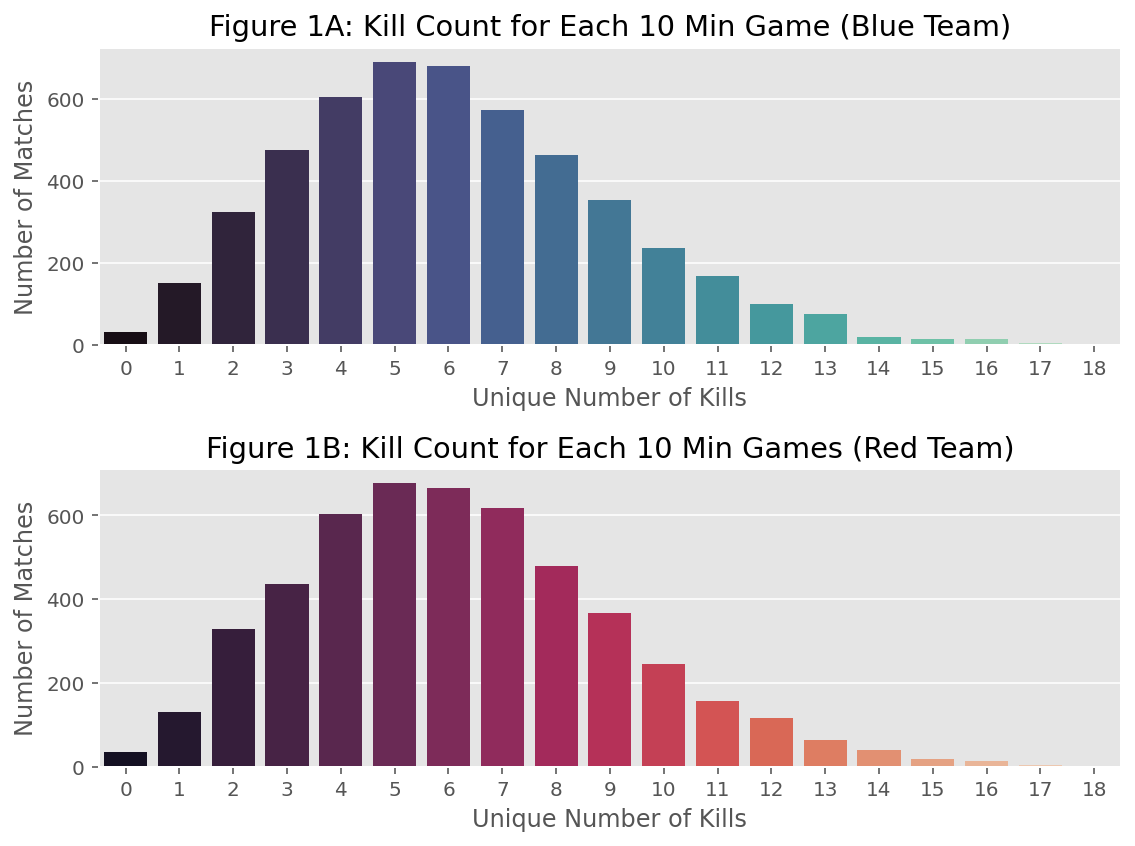

In [11]:
plt.subplots(figsize=(8,6))

plt.subplot(2,1,1)
ax = sns.countplot(x='blueKills', data=df, palette='mako')
plt.xlabel('Unique Number of Kills')
plt.ylabel('Number of Matches')
plt.title('Figure 1A: Kill Count for Each 10 Min Game (Blue Team)')

plt.subplot(2,1,2)
bx = sns.countplot(x='redKills', data=df, palette='rocket')
plt.xlabel('Unique Number of Kills')
plt.ylabel('Number of Matches')
plt.title('Figure 1B: Kill Count for Each 10 Min Games (Red Team)')

plt.tight_layout()
plt.show()

We count the unique number of kills that could happen within the first 10 minutes of the game. As seen in Figure 1A and 1B, the most common number of kills that happens within first 10 minutes of a match is 5 to 6 kills, regardless whether it was accomplished the Blue team or Red team. This matches closely with the numerical summary which displays the mean of `blueKills` as 6.18 and `redKills` as 6.14. There are few matches where the kill count is higher than 15, which have a possible contribution towards a win for a team.

***
## Literature Review

### Introduction

Rise of the “eSports” genre has brought forth an element of competitive play similar to physical sports with the NBA, AFL, MLB and others - organized teams that compete for victory against one another. Winning as an organized team is however subjectively easier to winning with a random selection of teammates, and in the case of eSports such as League of Legends that force random, temporary teams, nearing the upper echelons becomes increasingly difficult where more coordinated plays within a team become more and more apparent. It begs the question how top players in the top leagues are still able to flourish in highly competitive and coordinated environments, each with new teammates to cooperate with. This literature review, through existing journal articles and conference papers, aims to uncover the many other elements that contribute towards a team’s chance of winning a match that is not present in our predominantly nominal dataset. As such, understanding underlying themes such as the motivations of players, the social influences one must adapt in order to strive, as well as the skills that are utilized to both better and maintain such abilities are vital to interpret how different, external factors can influence the winning chances of a match.

### Cooperation and behaviour

Unlike traditional sports that maintain a focus on team-play, League of Legends ranked games (unlike it’s professional counterpart) is a predominantly solo-focused game. Multiplayer elements that force the player to work in random teams are constantly juxtaposed with individual interest such as the champion a player wishes to play, what role they wish to play in the team or their motivation and purpose for playing the game. Alongside is the element of randomization in matchmaking for both a player’s allies and enemies. Within such games that facilitates a constant balance between cooperation within the team as well as decision making that can put the team at an advantage over the enemy, the prominence of cooperation becomes highly sought after as a factor that influences winning the match [[1]](#source1). As a result of this, cooperation is more apparent in games with a “higher collective intelligence” [[1]](#source1) - higher ELO games with many players that have an inherent understanding of the fundamentals necessary to winning a game. Whether this communication be through pings or team chat: “the overall level of interaction within a network is related to a stronger performance” [[2]](#source2) - not exclusively belonging to the higher ladder but being more common throughout. Similarly, conflict that arises within a team demonstrates negative effects on the winning chances [[3]](#source3). The converse of a team-oriented group, a more centralized “shot-caller” approach, depicts the act of centralization as a “negative influence” [[2]](#source2). This forces many players to adapt and develop an “equal” mindset in order to maintain functional team cooperation within each match [[8]](#source8). It is likewise a sign to take a break when a player is unable to maintain a steady mindset, with one study’s interviewee stating that: “playing while angry or stressed makes you surprisingly bad at League of Legends. Take a break from time to time” [[8]](#source8), highlighting the importance of individual performance in functional team cooperation and extensively, winning the game.

### Dysfunctionality within a team

Likewise to benefits, factors that inhibit chances of winning a match expand from more than just a weak team-link. Including many debilitating behaviours ranging from abusive language, griefing, to more personal factors such as poor individual performance or playing an unfamiliar role [[13]](#source13), these behaviours often stem from a variety of uncontrollable circumstances. Likewise, the term “tilting” [[7]](#source7) within a player encompasses unregulated emotions that can influence their individual performance, decision making, and are often a result of uncontrollable circumstances such as frustration towards an underperforming player [[7]](#source7). As a consequence, players are naturally inclined to surrender the match and move on to the next match [[12]](#source12). Such results of conflict ultimately diminish winning chances [[3, 13]](#source3) as well as further individual performance [[6]](#source6). Player behaviour and interaction with one another thus becomes vital to maintain, ensuring consistency in winning the match, especially higher up the ranking ladder where every match counts [[11]](#source11); “They discipline their own ways of interaction to facilitate collaboration” [[8]](#source8).

### Priority within a team

Regardless of how efficient a team may be, it is nevertheless a requirement for players within the team to understand which aspects of the game are placed of higher priority, that is, decision making may serve as a crowning factor in influencing the result of a game. One article depicts the improvement in probabilistic inference within action video games [[4]](#source4), draws attention to the element of randomization that inhibits “standard learning paradigms”. Due to such, players become naturally adept at consciously making “better” decisions through experience - speculations that “neural mechanisms are responsible for a faster transfer of learning.” Under the clause that “situations are rarely, if ever, repeated”, this further highlights how higher ranked, more experienced players are often more adequate at making satisfactory decisions than many other players, possessing a rank that reflects such skills and is potentially a part as to why they climb the ladder in the first place [[5]](#source5). 


### Motivation

Many game companies offer rewards to diminish decline in intrinsic motivation, potentially playing a role in the “underlying motivational regulations for playing LoL” [[10]](#source10). Such a goal or reward may come in a multitude of ways, whether that be through personal development, proving one’s ability, glory, fame or money. Due to such, “A player’s motivation towards playing a game shapes their player experience and in-game behaviour” [[10]](#source10). Conversely, one’s experience may also shape a player’s motivation to continue improvement within the game [[5]](#source5). Such values that serve as clear reflections to one another epitomizes what allows top performers of the LoL player base to flourish in their competitive environments unlike more casual play, that is, to attain the goal or reward they desire and the motivation to continue pushing for said goal/reward. Regardless of the goal or reward, studies have proven that the reward one receives for their effort “increases their effort and improves performance” [[5]](#source5). Alongside such, it has likewise been illustrated how a more identified group continues to push their limits in contrast to a less identified group, whose motivation begins to decline along with their effort and motivation to play the game [[5]](#source5). This is especially highlighted in higher ranks of the ladder; players that belong to the top 0.5% are naturally identified as “the best” within the player base, potentially serving as a contributing factor allowing players to naturally continue seeking for new paths of improvement that better their chances of winning.


### Conclusion

It is apparent that winning a match is not exclusive to mere statistics, as many external factors play a crucial role in enabling victory within a team. Temporary teams that exhibit such desirable qualities such as cooperation, effective communication and a good understanding of the game at its core prove to have a greater chance of winning. Within these qualities, it is likewise more commonplace within higher ranked matches to encounter said characteristics - the motivation to win a game pushes players to continue to exhibit and develop these qualities in pursuit of their goals.
***

## References

[1]<a id='source1'></a> Birk, M., Mandryk, R., & Atkins, C. (2016). The motivation Push of Games: The interplay of Intrinsic Motivation and External Rewards in Games for Training. 2016 Annual Symposium on Computer-Human Interaction in Play (CHI PLAY '16), 291-303. Retrieved October 1, 2021, from https://dl.acm.org/doi/10.1145/2967934.2968091

[2]<a id='source2'></a> Brühlmann, F., Baumgartner, P., Wallner, G., Kriglstein, S., & Mekler, E. (2020). Motivational Profiling of League of Legends Players. Frontiers in Psychology. Retrieved October 1, 2021, from https://www.frontiersin.org/articles/10.3389/fpsyg.2020.01307/full

[3]<a id='source3'></a> Demediuk, S., Murrin, A., Bulger, D., Hitchens, M., Drachen, A., Raffe, W., & Tamassia, M. (2018). 2018. Player retention in league of legends: a study using survival analysis, 1-9. Retrieved October 1, 2021, from https://dl.acm.org/doi/abs/10.1145/3167918.3167937

[4]<a id='source4'></a> Green, C., Pouget, A., & Bavelier, D. (2010). Improved Probabilistic Inference as a General Learning Mechanism with Action Video Games. Current Biology, 20(17), 1573-1579. Retrieved October 1, 2021, from https://www.researchgate.net/publication/46219822_Improved_Probabilistic_Inference_as_a_General_Learning_Mechanism_with_Action_Video_Games

[5]<a id='source5'></a> Kim, Y., Engel, D., Woolley, A., Lin, J., McArthur, N., & Malone, T. (2016). What Makes a Strong Team? Collective Intelligence Predicts Team Performance in League of Legends. Academy of Management Proceedings(1), 13564. Retrieved October 1, 2021, from https://www.researchgate.net/publication/313739142_What_Makes_a_Strong_Team_Using_Collective_Intelligence_to_Predict_Team_Performance_in_League_of_Legends

[6]<a id='source6'></a> Kou Yubo. (2020). Toxic Behaviors in Team-Based Competitive Gaming: The Case of League of Legends. CHI PLAY'2020. Retrieved October 2, 2021, from https://www.researchgate.net/publication/343696767_Toxic_Behaviors_in_Team-Based_Competitive_Gaming_The_Case_of_League_of_Legends

[7]<a id='source7'></a> Kou, Y., & Gui, X. (2014). Playing with strangers: understanding temporary teams in league of legends. Proceedings of the first ACM SIGCHI annual symposium on Computer-human interaction in play, 161-169. Retrieved October 1, 2021, from https://dl.acm.org/doi/abs/10.1145/2658537.2658538

[8]<a id='source8'></a> Kou, Y., & Gui, X. (2017). The Rise and Fall of Moral Labor in an Online Game Community. 2017 ACM Conference on Computer Supported Cooperative Work and Social Computing (CSCW '17 Companion), (pp. 223-226). New York. Retrieved October 1, 2021, from https://dl.acm.org/doi/pdf/10.1145/3022198.3026312

[9]<a id='source9'></a> Kou, Y., Gui, X., & Kow, Y. (2016). Ranking practices and distinction in League of Legends. 3rd ACM SIGCHI Annual Symposium on Computer-Human Interaction in Play, CHI PLAY 2016 (pp. 4-9). Austin: CHI PLAY 2016 - Proceedings of the 2016 Annual Symposium on Computer-Human Interaction in Play. Retrieved October 1, 2021, from https://pennstate.pure.elsevier.com/en/publications/ranking-practices-and-distinction-in-league-of-legends

[10]<a id='source10'></a> Monge, C., & O'Brien, T. (2021). Effects of individual toxic behavior on team performance in League of Legends. Media Psychology, 1-23. Retrieved October 1, 2021, from https://www.tandfonline.com/doi/full/10.1080/15213269.2020.1868322

[11]<a id='source11'></a> Mora-Cantallops, M., & Sicilia, M.-Á. (2019). Team efficiency and network structure: The case of professional League of Legends. Social Networks, 58, 105-115. Retrieved October 1, 2021, from https://www.sciencedirect.com/science/article/pii/S0378873319300693

[12]<a id='source12'></a> Sharma, M., Anand, N., Amudhan, S., & Vashisht, A. (2021). Online gaming and tilting: Psychosocial exploration for promotion of emotional regulation. International Journal of Social Psychiatry, 1-3. Retrieved October 1, 2021, from https://journals.sagepub.com/doi/abs/10.1177/00207640211028602

[13]<a id='source13'></a> Shin, S.-J., Jeong, D., & Park, E. (2021). Effects of conflicts on outcomes: The case of multiplayer online games. Entertainment Computing, 38, 100407. Retrieved October 1, 2021, from https://www.sciencedirect.com/science/article/pii/S1875952121000045